1. Understanding the data:
Analyze and prepare the dataset to identify relevant features and define the target variable.
Handle missing data, outliers, and transform data to make it usable in algorithms.
2. Building predictive models :
Train models to meet two main objectives:
Classification: Identify target classes using techniques such as KNN, decision trees or SVM.
Regression: Predict a continuous variable (e.g., total) using algorithms such as regressive decision trees or Gradient Boosted Trees.
3. Performance evaluation:
Evaluate models using relevant metrics (precision, recall, F1-score, MSE, R²).
Compare the performance of different algorithms to select the best model for your needs.
4. Optimization and interpretation :
Optimize models (GridSearch, Cross-validation) to improve accuracy and reduce runtime.
Interpret results and identify strengths and weaknesses of trained models.

Translated with DeepL.com (free version)

# Exercise 7 - DT, gradient boosting and random forest for regression

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

We use the trip data again. This time we do not want to perform a classification according to high_revenue, but instead directly predict the numerical value turnover (total_sum).

In [52]:
# space
df = pd.read_csv('prepared_data2.csv')
df.head()

,year,month,startClusterID,endClusterID,isHoliday,weekday,daytime,distance,count,total,categorie_count
0,2021,3,3254026000002,3254026000007,1,0,7,3,15,45,1
1,2021,3,3241013050002,3241013050008,1,3,17,0,10,0,0
2,2021,3,3241013050007,3241013030001,1,5,11,3,10,30,0
3,2021,3,3254028001012,3254028001004,1,2,13,0,15,0,1
4,2021,3,3254028001003,3241013070001,1,2,18,7,10,70,0


## 7.1 Handling missing values
First of all, we start with the treatment of missing values.

In [53]:
# Vérifier les valeurs manquantes par colonne
valeurs_manquantes = df.isnull().sum()
print(valeurs_manquantes)
dfCopy=df.copy()

year               0
month              0
startClusterID     0
endClusterID       0
isHoliday          0
weekday            0
daytime            0
distance           0
count              0
total              0
categorie_count    0
dtype: int64


## 7.2 Coding of relevant attributes


In [80]:
# here we decide to encode the year in two class because we just have two occurances on this attributes
# and copy the date into a now sheet for the learning

labelenc = preprocessing.LabelEncoder()
labelenc.fit(dfCopy.isHoliday)
dfCopy['year'] = labelenc.transform(dfCopy.isHoliday)

dfPrepared = dfCopy.copy()

dfPrepared

,year,month,startClusterID,endClusterID,isHoliday,weekday,daytime,distance,count,total,categorie_count
0,1,3,3254026000002,3254026000007,1,0,7,3,15,45,1
1,1,3,3241013050002,3241013050008,1,3,17,0,10,0,0
2,1,3,3241013050007,3241013030001,1,5,11,3,10,30,0
3,1,3,3254028001012,3254028001004,1,2,13,0,15,0,1
4,1,3,3254028001003,3241013070001,1,2,18,7,10,70,0
...,...,...,...,...,...,...,...,...,...,...,...
237482,1,10,3241013050001,3241013080001,1,6,17,5,5,25,0
237483,0,10,3254028001012,3254028001003,0,4,9,0,15,0,1
237484,1,10,3254028001013,3254028003001,1,0,9,2,10,20,0
237485,1,10,3254026000014,3254026000003,1,4,18,5,5,25,0


## 7.3 Training the algorithms with k-fold cross-validation
In the following, three tree-based methods from the lecture "Supervised Methods Part 2" will be applied. For this purpose, a 10-fold cross-validation is to be applied and then the model is to be evaluated using statistical key figures.
In each case, use the function cross_val_predict(model, x,y,cv=10) for the cross-validation.

In [81]:
from sklearn.model_selection import cross_val_predict, cross_validate
import sklearn.metrics as metrics

# we decide here to reduce the number of the data just to have better learning time for each algorithms
# before splitting it into trainnning and testing data
df_sampled = dfPrepared.sample(frac=0.1, random_state=42)
x = df_sampled.drop(['count'], axis = 1)
y = df_sampled['count'].astype(int)

#### A1: Decision Tree Regressor


In [61]:
from sklearn.tree import DecisionTreeRegressor

# This line imports the DecisionTreeRegressor model from the scikit-learn library.
# This model is used to solve regression problems.
# It constructs a decision tree where each division is chosen to reduce a metric such as mean square error (MSE).

treeRegressor = DecisionTreeRegressor(min_samples_split = 10, min_samples_leaf = 5)
y_pred = cross_val_predict(treeRegressor, x, y, cv = 10)

Metrics for the evaluation:

In [62]:
mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)  
r2 = metrics.r2_score(y,y_pred)

print("Results from sklearn.metrics:\n")
print("R-Squared:", r2)
print()

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)

Results from sklearn.metrics:

R-Squared: 0.9546238488537901

MAE: 0.24514397825379342
MSE: 0.7649867007864638
RMSE: 0.8746351815394027


High R²: The model performs well in explaining variations in target data.
Low MAE and RMSE: The model's predictions are very close to the actual values, with low errors on average.
Difference MAE vs RMSE: As the difference between MAE and RMSE is moderate, this suggests that large errors are not too numerous.

after training the algorithm, we can  have a look at the important features for this conrete trained algorithm.

In [63]:
from sklearn.tree import DecisionTreeRegressor
treeRegressor.fit(x, y)

feature_importances = treeRegressor.feature_importances_

importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

           Feature  Importance
9  categorie_count    0.707250
8            total    0.142513
7         distance    0.138858
6          daytime    0.004708
5          weekday    0.003058
1            month    0.002221
2   startClusterID    0.000677
3     endClusterID    0.000295
4        isHoliday    0.000291
0             year    0.000130


This allows you to see which features the decision tree considers important and you can use these findings for further analyses.

#### A1.1: Decision Tree Regressor - additional parameters
Pruning is a technique used in decision trees to simplify the tree and avoid overfitting. 
Rules for pre-pruning are, for example, a maximum tree depth.

In [64]:
from sklearn.tree import DecisionTreeRegressor

treeRegressor = DecisionTreeRegressor(min_samples_split = 10, min_samples_leaf = 5,  max_depth=10, max_leaf_nodes=50 )
y_pred = cross_val_predict(treeRegressor, x, y, cv = 10)

In [65]:
mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)  
r2 = metrics.r2_score(y,y_pred)

print("Results from sklearn.metrics:\n")
print("R-Squared:", r2)
print()

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)

Results from sklearn.metrics:

R-Squared: 0.9606619396714198

MAE: 0.2531342461556066
MSE: 0.6631918359301621
RMSE: 0.8143659103438466


here we can see with the R-squared that this models perfoms than the simple decision tree model

In [82]:
from sklearn.tree import DecisionTreeRegressor
treeRegressor.fit(x, y)

feature_importances = treeRegressor.feature_importances_

importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

           Feature  Importance
9  categorie_count    0.713632
8            total    0.151296
7         distance    0.132614
6          daytime    0.000827
2   startClusterID    0.000716
1            month    0.000418
5          weekday    0.000320
0             year    0.000177
3     endClusterID    0.000000
4        isHoliday    0.000000


#### A2: Random Forest Regressor
Train the same way as above.

In [67]:
from sklearn.ensemble import RandomForestRegressor

forestRegressor = RandomForestRegressor(min_samples_split = 10, min_samples_leaf = 5, n_estimators = 100)

y_pred = cross_val_predict(forestRegressor, x, y, cv = 10)

In [68]:
mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)  
r2 = metrics.r2_score(y,y_pred)

print("Ergebnisse von sklearn.metrics:\n")
print("R-Squared:", r2)
print()

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)

Ergebnisse von sklearn.metrics:

R-Squared: 0.9611301864233199

MAE: 0.24687836232009644
MSE: 0.6552977653921847
RMSE: 0.8095046419830986


the forest tree regressor just show a better performances than the previous, we can conclute that the complexity and mutiples decisions trees inside perfoms the 
models 

In [69]:
forestRegressor.fit(x, y)

feature_importances = forestRegressor.feature_importances_

importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

           Feature  Importance
9  categorie_count    0.705801
8            total    0.143220
7         distance    0.137727
6          daytime    0.005355
5          weekday    0.003318
1            month    0.002940
3     endClusterID    0.000516
2   startClusterID    0.000498
4        isHoliday    0.000324
0             year    0.000302


#### A2.1: Random Forest Regressor - additional parameters

In [70]:
from sklearn.ensemble import RandomForestRegressor

forestRegressor = RandomForestRegressor(min_samples_split = 10, min_samples_leaf = 5, n_estimators = 100, max_depth=10, max_leaf_nodes=50 )

y_pred = cross_val_predict(forestRegressor, x, y, cv = 10)

In [71]:
mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)  
r2 = metrics.r2_score(y,y_pred)

print("Results from sklearn.metrics:\n")
print("R-Squared:", r2)
print()

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)

Results from sklearn.metrics:

R-Squared: 0.9621189376337388

MAE: 0.25327845672988175
MSE: 0.6386286229627239
RMSE: 0.799142429709951


#### A3: Gradient Boost Trees (Regression)
Train the same way as above.

In [72]:
from sklearn.ensemble import GradientBoostingRegressor

gbRegressor = GradientBoostingRegressor(n_estimators = 100, max_depth = 4)

y_pred = cross_val_predict(gbRegressor, x, y, cv = 10)

In [73]:
mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)  
r2 = metrics.r2_score(y,y_pred)

print("Ergebnisse von sklearn.metrics:\n")
print("R-Squared:", r2)
print()

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)

Ergebnisse von sklearn.metrics:

R-Squared: 0.9622594471997025

MAE: 0.28439852122006903
MSE: 0.6362598026335348
RMSE: 0.797658951327906


#### A3.1: Gradient Boost Trees (Regression) - additional Parameters

In [74]:
from sklearn.ensemble import GradientBoostingRegressor

gbRegressor = GradientBoostingRegressor(n_estimators = 100, max_depth = 4,  max_leaf_nodes=50,  min_samples_leaf = 5)

y_pred = cross_val_predict(gbRegressor, x, y, cv = 10)

In [75]:
mae = metrics.mean_absolute_error(y, y_pred)
mse = metrics.mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)  
r2 = metrics.r2_score(y,y_pred)

print("Results from sklearn.metrics:\n")
print("R-Squared:", r2)
print()

print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)

Results from sklearn.metrics:

R-Squared: 0.9621461489851864

MAE: 0.28554666885176216
MSE: 0.6381698726843951
RMSE: 0.7988553515401866


## 7.4 Interpretation of the quality criteria
Interpret the quality criteria and make a statement on the usability of the models.

## 7.5 Train several models simultaneously and compare them visually
Go through the code below and follow the individual steps. What does the visualization tell you?

In [76]:
import time

estimators = [('DT', DecisionTreeRegressor(min_samples_split = 10, min_samples_leaf = 5)),
    ('RF', RandomForestRegressor(min_samples_split = 10, min_samples_leaf = 5, n_estimators = 100)), 
              ('GB', GradientBoostingRegressor(n_estimators = 100, max_depth = 4))]

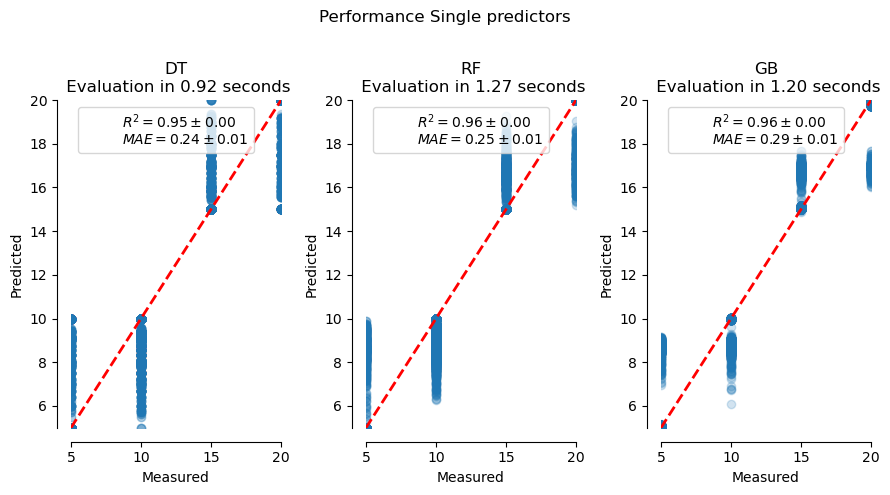

In [78]:
def plot_regression_results(ax, y, y_pred, title, scores, elapsed_time):
    """Scatter plot of the predicted vs true targets."""
    ax.plot([y.min(), y.max()],
            [y.min(), y.max()],
            '--r', linewidth=2)
    ax.scatter(y, y_pred, alpha=0.2)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([y.min(), y.max()])
    ax.set_ylim([y.min(), y.max()])
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
    ax.legend([extra], [scores], loc='upper left')
    title = title + '\n Evaluation in {:.2f} seconds'.format(elapsed_time)
    ax.set_title(title)


fig, axs = plt.subplots(1, 3, figsize=(9, 5))
axs = np.ravel(axs)

for ax, (name, est) in zip(axs, estimators):
    start_time = time.time()
    score = cross_validate(est, x, y,
                           scoring=['r2', 'neg_mean_absolute_error'],
                           n_jobs=-1, verbose=0)
    elapsed_time = time.time() - start_time

    y_pred = cross_val_predict(est, x, y, n_jobs=-1, verbose=0)

    plot_regression_results(
        ax, y, y_pred,
        name,
        (r'$R^2={:.2f} \pm {:.2f}$' + '\n' + r'$MAE={:.2f} \pm {:.2f}$')
        .format(np.mean(score['test_r2']),
                np.std(score['test_r2']),
                -np.mean(score['test_neg_mean_absolute_error']),
                np.std(score['test_neg_mean_absolute_error'])),
        elapsed_time)

plt.suptitle('Performance Single predictors')
plt.tight_layout()
plt.subplots_adjust(top=0.8)
plt.show()

## RESUME
The main objective of this exercise was to build a regression model based on decision trees, evaluate its performance using metrics such as R², MAE, MSE and RMSE, and understand the quality of predictions.


## SUGGESTIONS AND IMPROVEMENTS

Increase the algorith precision
- Use correlation algorithms to retain only the most relevant attributes 
- Create new variables (Feature Engineering) from existing data.

Reduce training time:
- Reduce data size:
     Use stratified sampling to train the model on a representative sub-section of the data.
- Remove unnecessary observations or columns.